The New York Times web site provides a rich set of APIs, as described here: https://developer.nytimes.com/apis

You’ll need to start by signing up for an API key. Your task is to choose one of the New York Times APIs, construct an interface in R to read in the JSON data, and transform it into an R DataFrame.

# Libraries

For this assignment, I will be using the tidyverse and stringr packages for data tidying/structuring, jsonlite package for data import, and ggplot to visualize the data.

In [ ]:
library(tidyverse)
library(jsonlite)
library(stringr)
library(ggplot2)

# Connect to the API

I will be using the Top Stories API, filtered for the following sections:

Science
Technology
Health
Let’s first read in the data from the API:

In [ ]:
url <- paste("https://api.nytimes.com/svc/topstories/v2/science.json?api-key=", apiKey, sep='')

scienceData <- fromJSON(url) %>% 
  as.data.frame() %>%
  select(-results.multimedia)

url2 <- paste("https://api.nytimes.com/svc/topstories/v2/technology.json?api-key=", apiKey, sep='')

techData <- fromJSON(url2) %>% 
  as.data.frame() %>%
  select(-results.multimedia)

url3 <- paste("https://api.nytimes.com/svc/topstories/v2/health.json?api-key=", apiKey, sep='')

healthData <- fromJSON(url3) %>% 
  as.data.frame() %>%
  select(-results.multimedia)

# Tidy the Data

Now that we have the data loaded in, let’s bind all of our sets and then clean it up a bit. First, let’s subset it to just the info we would like to see:

In [ ]:
finalData <- rbind(scienceData,techData,healthData)

finalData <- finalData %>%
  select(last_updated,results.published_date,results.section,results.subsection, results.title,results.abstract,results.url, results.byline, results.des_facet)

Next, we’ll rename our columns:

In [ ]:
colnames <- c('LAST_UPDATED', 'PUBLISHED_DATE', 'WEBSITE_SECTION' , 'WEBSITE_SUBSECTION', 'TITLE', 'ABSTRACT', 'URL', 'AUTHOR', 'TAGS')

colnames(finalData) <- colnames

Now, we’ll clean up the AUTHOR column by removing the word by.

In [ ]:
finalData$AUTHOR <- str_replace(finalData$AUTHOR,'By ','')

The last thing we can do is unlist all of the tags that appear in the TAGS column. This will allow us to more easily analyze the data – each record in the final dataset will represent an article with one of its tags.

In [ ]:
finalData <- unnest(finalData, TAGS)
head(finalData)

In [ ]:
##                LAST_UPDATED            PUBLISHED_DATE WEBSITE_SECTION
## 1 2019-10-27T19:57:22-04:00 2019-10-27T05:00:11-04:00         Science
## 2 2019-10-27T19:57:22-04:00 2019-10-27T05:00:11-04:00         Science
## 3 2019-10-27T19:57:22-04:00 2019-10-27T05:00:11-04:00         Science
## 4 2019-10-27T19:57:22-04:00 2019-10-27T05:00:11-04:00         Science
## 5 2019-10-27T19:57:22-04:00 2019-10-27T05:00:11-04:00         Science
## 6 2019-10-27T19:57:22-04:00 2019-10-27T05:00:11-04:00         Science
##   WEBSITE_SUBSECTION                                             TITLE
## 1                    Growing Meat in a Lab That Doesn’t Look Like Mush
## 2                    Growing Meat in a Lab That Doesn’t Look Like Mush
## 3                    Growing Meat in a Lab That Doesn’t Look Like Mush
## 4                    Growing Meat in a Lab That Doesn’t Look Like Mush
## 5                    Growing Meat in a Lab That Doesn’t Look Like Mush
## 6                    Growing Meat in a Lab That Doesn’t Look Like Mush
##                                                                                                 ABSTRACT
## 1 In their quest to make a lab-grown steak, researchers devised a form of scaffolding made with gelatin.
## 2 In their quest to make a lab-grown steak, researchers devised a form of scaffolding made with gelatin.
## 3 In their quest to make a lab-grown steak, researchers devised a form of scaffolding made with gelatin.
## 4 In their quest to make a lab-grown steak, researchers devised a form of scaffolding made with gelatin.
## 5 In their quest to make a lab-grown steak, researchers devised a form of scaffolding made with gelatin.
## 6 In their quest to make a lab-grown steak, researchers devised a form of scaffolding made with gelatin.
##                                                                URL
## 1 https://www.nytimes.com/2019/10/27/science/lab-meat-texture.html
## 2 https://www.nytimes.com/2019/10/27/science/lab-meat-texture.html
## 3 https://www.nytimes.com/2019/10/27/science/lab-meat-texture.html
## 4 https://www.nytimes.com/2019/10/27/science/lab-meat-texture.html
## 5 https://www.nytimes.com/2019/10/27/science/lab-meat-texture.html
## 6 https://www.nytimes.com/2019/10/27/science/lab-meat-texture.html
##         AUTHOR                     TAGS
## 1 KNVUL SHEIKH                     Meat
## 2 KNVUL SHEIKH                     Food
## 3 KNVUL SHEIKH                 Research
## 4 KNVUL SHEIKH Biology and Biochemistry
## 5 KNVUL SHEIKH                  Seafood
## 6 KNVUL SHEIKH                  Gelatin

# Analyze

Now that we have the data tidied up, we can take a look at it! First, let’s look at the tags in the list to see if there are any trends.

In [ ]:
finalCounts <- as.data.frame(table(finalData$TAGS)%>% sort(decreasing= TRUE))
colnames(finalCounts) <- c('Tag', 'Frequency')

top_n(finalCounts, n=20, Frequency) %>%
          ggplot(., aes(x=Tag, y=Frequency))+
              geom_bar(stat='identity') + 
  ggtitle("Top tags for NY Times articles") + 
  xlab("Tag") + ylab("Number of articles") +
  theme(axis.text.x = element_text(angle = 90))

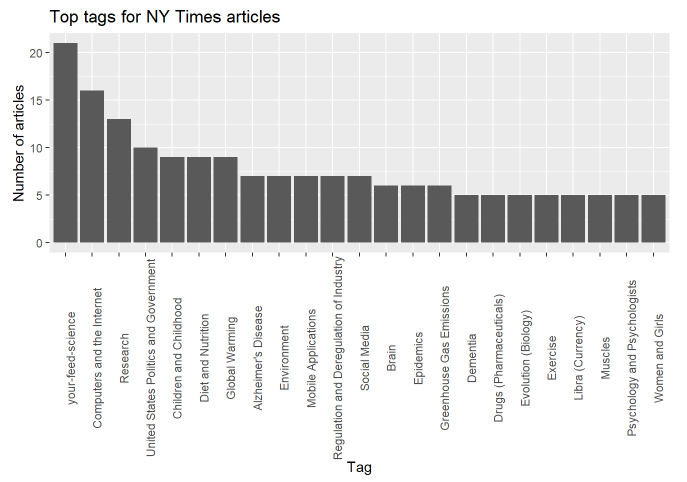

# Conclusions

Interestingly, the top tag for articles listed on the NY Times Science, Tech, and Health websites are “your-feed-science”, “Compuers and the Internet”, “Research”, and “United States Politics and Government”. Since this data is updated regularly, it would be interesting to see how it changes over time. (Future project?) It would also be interesting to add in data from some of the other sections of the NY Times website as well.